In [1]:
import ROOT

Welcome to JupyROOT 6.11/01


###  Gaussian smearing, systematic translation, and variable inefficiency 

In [2]:
def smear(xt):
  xeff = 0.3 + (1.0-0.3)/20*(xt+10.0);  #  efficiency                                                                                  
  x = ROOT.gRandom.Rndm();
  if x>xeff: return None;
  xsmear = ROOT.gRandom.Gaus(-2.5,0.2);     #  bias and smear                                                                               
  return xt + xsmear;

### Example Unfolding  
First we train

In [3]:
response = ROOT.RooUnfoldResponse (40, -10.0, 10.0);

#  Train with a Breit-Wigner, mean 0.3 and width 2.5.                                                                                 
for i in xrange(100000):
  xt = ROOT.gRandom.BreitWigner (0.3, 2.5);
  x = smear(xt);
  if x!=None:
    response.Fill (x, xt);
  else:
    response.Miss (xt);

Then we test

In [4]:
hTrue = ROOT.TH1D ("true", "Test Truth",    40, -10.0, 10.0);
hMeas = ROOT.TH1D ("meas", "Test Measured", 40, -10.0, 10.0);
#  Test with a Gaussian, mean 0 and width 2.                                                                                          
for i in xrange(10000):
    xt = ROOT.gRandom.Gaus (0.0, 2.0)
    x = smear (xt);
    hTrue.Fill(xt);
    if x != None: hMeas.Fill(x);

10000.0 6526.0


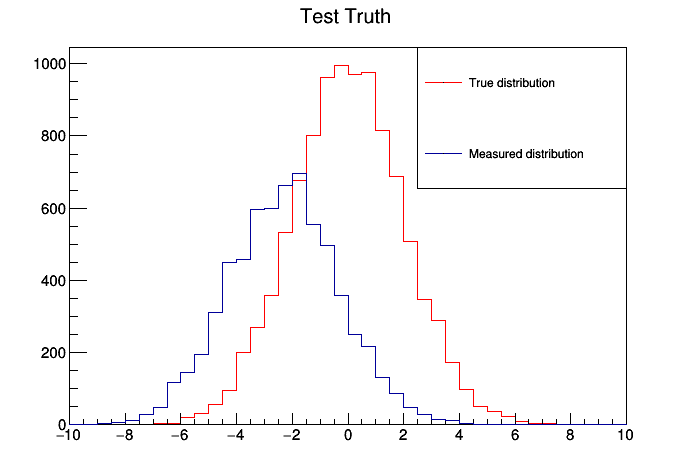

In [5]:
print hTrue.GetEntries(), hMeas.GetEntries()

c1 = ROOT.TCanvas()
hTrue.SetStats(0)
hTrue.SetLineColor(2)
hTrue.Draw()
hMeas.Draw("same")

leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.AddEntry(hTrue, "True distribution","pl")
leg.AddEntry(hMeas, "Measured distribution", "pl")
leg.Draw()
c1.Draw()

## Unfold!
### Bayesian

In [6]:
unfold = ROOT.RooUnfoldBayes(response, hMeas, 4)
hReco = unfold.Hreco()

Now unfolding...
Iteration : 0
Chi^2 of change 970.321
Iteration : 1
Chi^2 of change 7.84678
Iteration : 2
Chi^2 of change 1.56566
Iteration : 3
Chi^2 of change 0.843821
Calculating covariances due to number of measured events


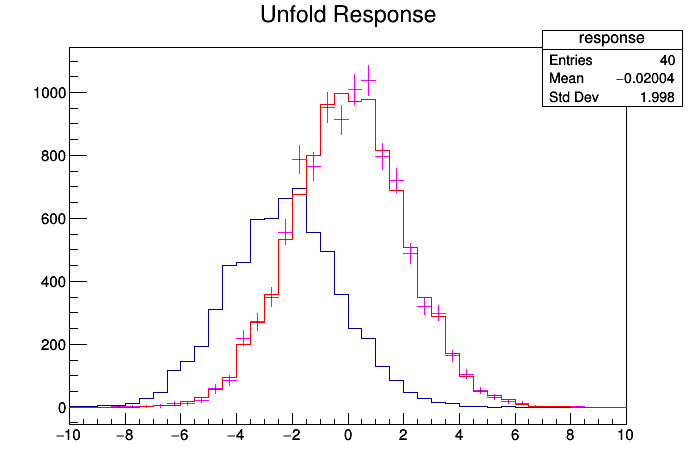

In [7]:
c1 = ROOT.TCanvas()
hReco.SetLineColor(6)
hReco.Draw()
hMeas.Draw("same")
hTrue.Draw("same")
c1.Draw()

### SVD

SVD init 40 x 40 bins, kreg=20


Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 20
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.008766


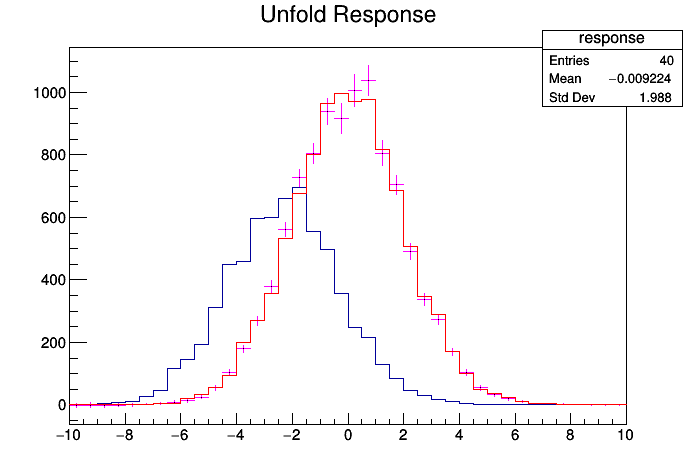

In [8]:
unfold = ROOT.RooUnfoldSvd(response, hMeas, 20)
hReco = unfold.Hreco()
c1 = ROOT.TCanvas()
hReco.SetLineColor(6)
hReco.Draw()
hMeas.Draw("same")
hTrue.Draw("same")
c1.Draw()

### Ids

IDS init 40 x 40


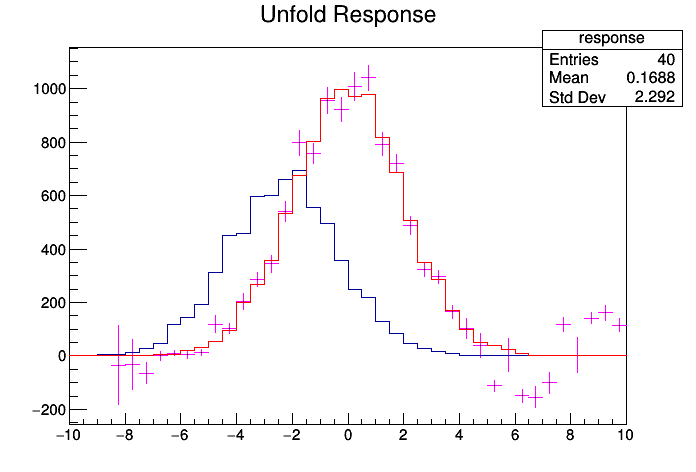

In [9]:
unfold = ROOT.RooUnfoldIds(response, hMeas, 3)
hReco = unfold.Hreco()
c1 = ROOT.TCanvas()
hReco.SetLineColor(6)
hReco.Draw()
hMeas.Draw("same")
hTrue.Draw("same")
c1.Draw()